# Logbook for PHAS0030 Mini-project
Author: Joel Pérez Ferrer

SN: 18082660

Year 2019-2020

Group 7 (BrazilNuts), supervised by Zara Grout.

## 30/01/2020: First meeting with supervisor

Looked through the given paper and done a bit of research on MC methods. 
Went over some points in common. 

**Notes partially provided by our supervisor**

- How does the experiment look? Completely 2D with an infinite height - concentrating on the bottom of the box.

- Do we need to display the configurations? No and wouldn't probably slow the simulation far too much, but could have snapshots after certain number of iterations (say every 1000). Would be useful to at least plot the starting and ending configurations, as seen in the referenced paper.

- How does the shaking work? Particles are all moved upwards and as MC is run they will start to move towards the bottom of the box as moves downwards will be energetically favourable for the particles due to gravity.

- Some discussion of how much physics is included in the simulation.

- Discussion of size of particles to use and whether they will all have same density.

- Start with the setup and listed functions which can be carried out without running the MC, and perhaps reviewing MC material covered in last years mathematica course.

- Should we cite sources for code found from the internet? Yes if this is more than explanation of function arguments or similar. Good practice anyway to understand solutions and think whether you can better adapt them to the problem you are looking at.

- Log books: make sure to note when you meet and discuss aspects, good idea to keep note of these meetings too in some form. Good to note any failures or problems.

- Various possibilities to extend once instructions have been followed, best to complete task as detailed first.

- We are restricted to `matplotlib`, `numpy` and `scipy` and adviced to be using only 'core' functionality of Python (i.e. no dictionaries or OOP)

# 5/02/2020: Set-up & visualisation
The document associated with this mini-project contained a list of chunks of code that were going to be needed before we implement the Monte Carlo method:
  * ~~Code to check whether particle (i.e. a nut or any other bit of muesli) overlaps the sides or bottom of the box.~~
  * ~~Code to check whether two particles overlap.~~
  * ~~Code to find the largest nearest-neighbour distance between particles (that is, find the shortest distance from each particle to any other particle, and then find the largest of those distances.~~
  * ~~Code to draw the arrangement of particles.~~
  * ~~Code to determine the potential energy~~

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import time 

In [3]:
# Here we will be defining some constants:
b_nut_r = 1.0         # Radius of the brazilian nut
radii = [0.5, 1.0]    
r_nut_r = b_nut_r/2   # Radius of the rest of the nuts
h_allocation = 1.0    # Distance between each nut in the set-up
box_w = 5.0          # Width of the box

In [4]:
def display_box(nuts, positions, show_axis):
    """
    Displays the box of nuts.
    
    Args:
        nuts: array describing the type of every nut. 0: regular 1: brazilian.
        positions: 2D array describing the x and y coordinate of every nut.
        show_axis: bool on whether or not to display labels and values in the axes.
        
    Returns:
        Nothing, but outputs the rending in the screen.
    """
    circle_list = []
    for i in range(len(nuts)):
        if nuts[i] == 1:
            new_circle = plt.Circle(positions[i], radii[1], color='c')
            circle_list.append(new_circle)
        elif nuts[i] == 0:
            new_circle = plt.Circle(positions[i], radii[0], color='b')
            circle_list.append(new_circle)

    fig, ax = plt.subplots(figsize=(5, 10))
    
    ax.set_xlim([0, box_w])
    ax.set_ylim([0, 10])
    
    
    for drawn_circle in circle_list:
        ax.add_artist(drawn_circle)

In [5]:
def initial_preparation(max_n, b_nut_chance):
    """
    Prepares the initial set of nuts according to the document.
    Always starts with a brazilian nut at the bottom.
    
    Args:
        max_n: maximum number of nuts
        b_nut_chance: chance for a nut to be brazilian
    
    Returns: 
        nuts: array of the types of nuts generated. 1 is brazilian, 0 is regular
        positions: 2D array of the locations of the nuts
    """
    nuts = np.zeros(max_n)
    positions = np.zeros((max_n,2))
    
    current_h = radii[1]
    nuts[0] = 1
    positions[0] = np.array([rand.randrange(radii[1], box_w-radii[1]), current_h])
    n = 1
    current_h = radii[0] + radii[1]

    
    while n < max_n:
        current_h += 2*radii[0]
        nuts[n] = 0
        positions[n] = np.array([rand.uniform(radii[0], box_w-radii[0]), current_h])
        n += 1
    return nuts, positions

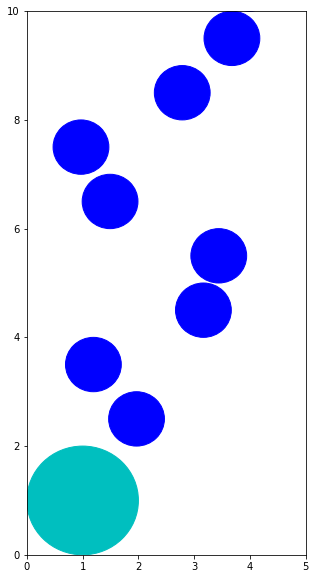

In [6]:
# Let's play around with our functions now! 
nuts, positions = initial_preparation(11, 0)
display_box(nuts, positions,0)

In [7]:
def check_overlap_walls(nut, position):
    """
    Checks if a nut in a given position overlaps with the bottom or the sides of the box
    
    Args: 
        nut: type of the nut
        position: array of the x and y coordinates of the nut
    Returns:
        bool True if the nut overlaps with the walls of the box
    """
    if position[0] >= radii[int(nut)] and position[0] <= box_w-radii[int(nut)] and position[1] > radii[int(nut)]:
        return False
    else: 
        return True

In [8]:
def check_overlap_nuts(nut1, position1, nut2, position2):
    """
    Checks if two nuts in the given positions overlap with each other 
    
    Args: 
        nut1: type of the first nut
        position1: array of the x and y coordinates of the first nut 
        nut2: type of the second nut
        position2: array of the x and y coordinates of the second nut 
    """
    if np.sqrt((position1[0]-position2[0])**2 + (position1[1]-position2[1])**2) > (radii[int(nut1)]+radii[int(nut2)]):
        return False
    else: 
        return True

False


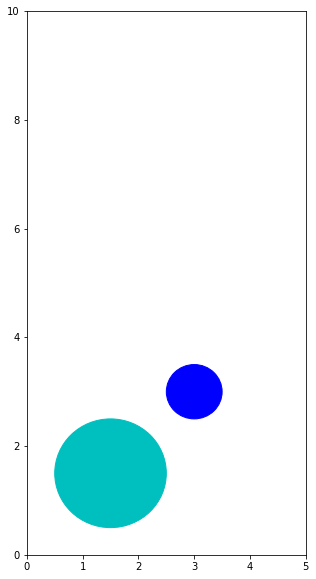

In [11]:
position1 = [1.5, 1.5]
position2 = [3.0, 3.0]
print(check_overlap_nuts(1, position1, 0, position2))
display_box([1,0], [position1, position2],0)

In [9]:
def largest_nearest_neighbor(nuts, positions):
    """
    Returns the largest possible shortest distance between the given array of particles.
    
    Args:
        nuts: array containing the types of nuts
        positions: array containing the x and y corrdinates of the positions of the nuts
    Returns:
        largest_distance: largest distance found
        a: index of the first nut
        b: index of the second nut
    """
    largest_distance = 0
    a = 0
    b = 0
    for i in range(len(nuts)):
        for j in  range(len(nuts)):
            dij = np.sqrt((positions[i][0]-positions[j][0]-radii[int(nuts[i])]-radii[int(nuts[j])])**2 + (positions[i][1]-positions[j][1]-radii[int(nuts[i])]-radii[int(nuts[j])])**2)
            if dij > largest_distance:
                largest_distance = dij
                a = i
                b = j 
    return largest_distance, a, b

In [13]:
position1 = [1.5, 1.0]
position2 = [3.0, 3.0]
position3 = [3.5, 3.5]
print(largest_nearest_neighbor([0,0,0], [position1, position2, position3]))

(4.6097722286464435, 0, 2)


In [10]:
def energy(positions):
    """
    Calculates E/mg of the system given the positions of the nuts
    
    Args: 
        positions: x and y coordinates of the nuts
    Returns:
        Sum of E/mg for all the nuts in the system 
    """
    energy = 0
    for position in positions:
        energy += position[1]
    return energy

In [15]:
print(energy([position1, position2, position3]))

7.5


# 6/02/2020: Initial Monte Carlo method 
The task is to do the following: 
  * Pick a particle at random.
  * Move it a random distance horizontally and vertically.
  * If the move improves the energy and is physically possible (does not lead to overlaps), accept it.
  
Some points to note are:
  * The algorithm __does not__ follow the path of a particle. The particle just "jumps".
  * The particles move side ways as well as vertically.
  * Use the largest nearest-neighbour distance to control the step length.

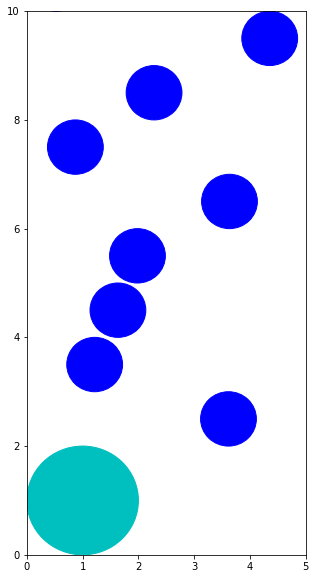

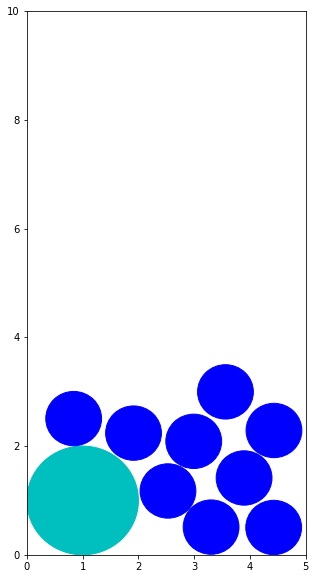

In [16]:
max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)

iters = 0
while iters < 100:
    iters += 1
    max_step_length = largest_nearest_neighbor(nuts,positions)[0]
    inner_iters = 0
    while inner_iters < 1000:
        inner_iters += 1
        current = rand.randrange(max_n)
        x_step = rand.uniform(- max_step_length, max_step_length)
        y_step = rand.uniform(- max_step_length, 0)
        new_positions = np.copy(positions)
        new_nuts = np.copy(nuts)
        new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
        nuts_to_check = np.delete(new_nuts, current)
        positions_to_check = np.delete(new_positions,current, axis=0)
        
        # Testing for overlap with walls
        if check_overlap_walls(nuts[current], new_positions[current]):
                continue
        
        # Testing for collisions
        passed_collisions = True        
        for i in range(len(nuts_to_check)):
            if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                passed_collisions = False
                break
        if not passed_collisions:
            continue
        
        # Test for energy:
        if energy(positions) > energy(new_positions):
            positions = new_positions
            valid_move = True
display_box(nuts, positions,0)


In [11]:
def shake_box(positions):
    """
    Shakes the box, multiplying all the vertical coordinates by 2
    """
    new_positions = np.zeros(positions.shape)
    for i in range(len(new_positions)):
        new_positions[i] = np.array([positions[i][0], 2*positions[i][1]])
    return new_positions

In [18]:
def mc_method(nuts, positions, max_moves, max_attempts):
    current_positions = np.copy(positions)
    iters = 0
    while iters < 100:
        iters += 1
        max_step_length = largest_nearest_neighbor(nuts,current_positions)[0]
        inner_iters = 0
        while inner_iters < 1000:
            inner_iters += 1
            current = rand.randrange(max_n)
            x_step = rand.uniform(- max_step_length, max_step_length)
            y_step = rand.uniform(- max_step_length, 0)
            new_positions = np.copy(current_positions)
            new_nuts = np.copy(nuts)
            new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
            nuts_to_check = np.delete(new_nuts, current)
            positions_to_check = np.delete(new_positions,current, axis=0)

            # Testing for overlap with walls
            if check_overlap_walls(nuts[current], new_positions[current]):
                    continue

            # Testing for collisions
            passed_collisions = True        
            for i in range(len(nuts_to_check)):
                if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                    passed_collisions = False
                    break
            if not passed_collisions:
                continue

            # Test for energy:
            if energy(positions) > energy(new_positions):
                current_positions = new_positions
                valid_move = True
    return nuts, current_positions


KeyboardInterrupt: 

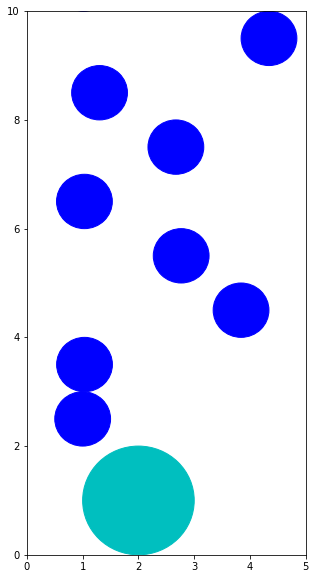

In [19]:
max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)
positions_after_shake = np.copy(positions)

shake_iters = 20
for i in range(shake_iters):
    next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, 0, 0)
    if i is not shake_iters-1:
        positions_after_shake = shake_box(positions_after_shake)

    
display_box(nuts, positions_after_shake,0)


By playing around with the parameters we can quickly realize that our algorithm scales quite terribly as the number of nuts increases or we 'shake' the box many times. The key to achieve better performance will be setting a more conservative threshold and being smarter about the displacements whilst still avoiding local energy minima. 

## 24/02/2020: Monte Carlo method reloaded
Now we will change some parts of the code to adjust more to what the script suggests and implement the Metropolis apprach. The key feature of the Metropolis approach is that we will be introducing a probability $p(\Delta E)$ of taking positive increments in the overall energy of the system.

This probability is defined as: 
$$ p(\Delta E) = e^{- \frac{\Delta E}{k_B T}} $$

And instead of running an arbitrary amount of iterations and attempts before _shaking_ our configuration again we will be checking what the overall energy gain was in the last 1000 attempts.

In [17]:
def mc_method(nuts, positions, beta_value, d_e_minimum):
    """
    Metropoli Monte Carlo method to _settle_ a set of nuts.
    
    Runs until after the difference in energy after a 1000 attempted moves is lower than the threshold. 
    **Note that we assume that all the nuts are the same size.**
    
    Input: 
    
    Returns:
    
    """
    current_positions = np.copy(positions)
    max_step_length = largest_nearest_neighbor(nuts,current_positions)[0]
    d_e = -1000
    
    while d_e < d_e_minimum:
        d_e = 0
        attempts = 0
        while attempts < 30000:
            max_step_length = largest_nearest_neighbor(nuts,current_positions)[0]
            attempts += 1
            x_step = rand.uniform( - max_step_length, max_step_length)
            y_step = rand.uniform( - max_step_length, max_step_length)
            
            # Check if the change in energy is positive (i.e. positive y_step)
            if y_step > 0:
                prob = np.exp(- beta_value*y_step*9.81)
                if rand.uniform(0,1) > prob: # Now we will make the attempt pass the probability test
                    continue
            
            new_positions = np.copy(current_positions)
            new_nuts = np.copy(nuts)
            current = rand.randrange(max_n)
            new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
            nuts_to_check = np.delete(new_nuts, current)
            positions_to_check = np.delete(new_positions,current, axis=0)

            # Testing for overlap with walls
            if check_overlap_walls(nuts[current], new_positions[current]):
                continue

            # Testing for collisions
            passed_collisions = True
            for i in range(len(nuts_to_check)):
                if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                    passed_collisions = False
                    break
            if not passed_collisions:
                continue

            d_e += y_step*9.81
            current_positions = new_positions
                
    return nuts, current_positions

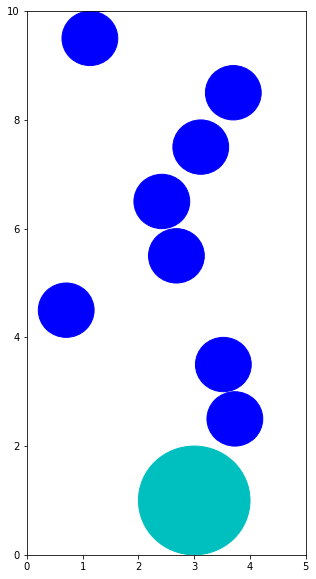

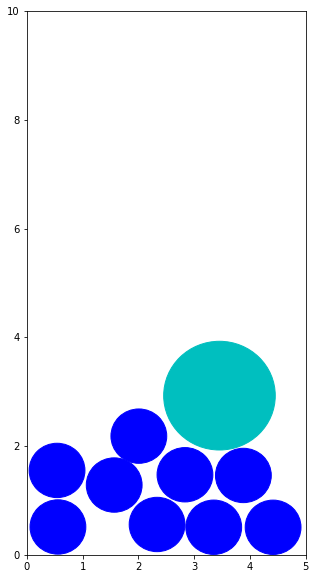

In [18]:
max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)
positions_after_shake = np.copy(positions)

shake_iters = 5
for i in range(shake_iters):
    next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, 10*16, -0.01)
    if i is not shake_iters-1:
        positions_after_shake = shake_box(positions_after_shake)

display_box(nuts, positions_after_shake ,0)

Even though this method resulted in much faster running times the system does not end up in a very 'settled' configuration. This will need to be fixed.

## 25/02/2020: Monte Carlo method reloaded, the day after
After some code investigation it would seem that the key reason why the configuration does not seem to be 'settled' at the end of the MC method has to do with how we're treating different attempts. This was because of a bug in the way we were comparing the accumulated energy difference in every 1000 attempts. We need to do the check at the end of the while loop, not at the beginning.

In [19]:
def mc_method(nuts, positions, beta_value, d_e_minimum):
    """
    Metropoli Monte Carlo method to _settle_ a set of nuts.
    
    Runs until after the difference in energy after a 1000 attempted moves is lower than the threshold. 
    **Note that we assume that all the nuts are the same weight.**
    
    Input: 
    
    Returns:
    
    """
    current_positions = np.copy(positions)
    
    # We will exit this loop once d_e > d_e_minimum
    while True:
        attempts = 0 
        d_e = 0
        while attempts < 3000:
            current = rand.randrange(max_n)

            max_step_length = largest_nearest_neighbor(nuts,current_positions)[0]
            attempts += 1
            x_step = rand.uniform( - max_step_length/2, max_step_length/2)
            y_step = rand.uniform( - max_step_length/2, max_step_length/2)
            
            # Check if the change in energy is positive (i.e. positive y_step)
            if y_step > 0:
                prob = np.exp(- beta_value*y_step*9.81)
                if rand.uniform(0,1) > prob: # Now we will make the attempt pass the probability test
                    continue
            
            new_positions = np.copy(current_positions)
            new_nuts = np.copy(nuts)
            
            new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
            nuts_to_check = np.delete(new_nuts, current)
            positions_to_check = np.delete(new_positions,current, axis=0)

            # Testing for overlap with walls
            if check_overlap_walls(nuts[current], new_positions[current]):
                continue

            # Testing for collisions
            passed_collisions = True
            for i in range(len(nuts_to_check)):
                if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                    passed_collisions = False
                    break
            if not passed_collisions:
                continue

            d_e += y_step*9.81
            
            current_positions = new_positions
        if d_e > d_e_minimum:
            break
                
    return nuts, current_positions

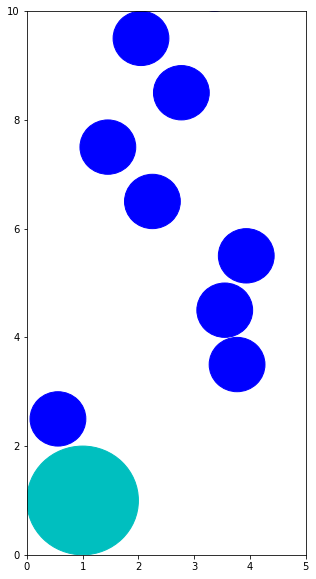

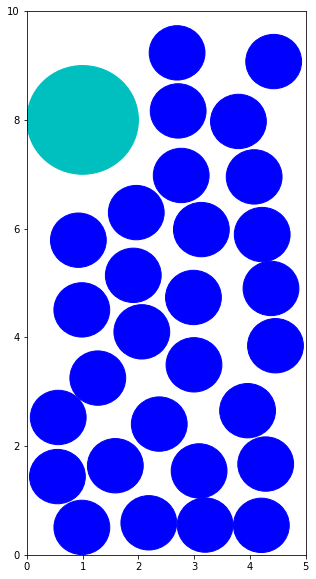

In [20]:
max_n = 30
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)
positions_after_shake = np.copy(positions)

shake_iters = 4
for i in range(shake_iters):
    next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, 10*16, -0.000001)
    if i is not shake_iters-1:
        positions_after_shake = shake_box(positions_after_shake)

display_box(nuts, positions_after_shake ,0)

## 27/02/2020: Changing the way we displace the nuts
Since our function `largest_nearest_neighbor` gives the radial distance we should change the way we calculate our random displacement. Instead of generating the x and y steps as functions of `largest_nearest_neighbor` we will calculate a radius and a random angle and then project onto the x and y components.

In [21]:
step = rand.uniform(0, 5)
angle = rand.uniform(0, 2*np.pi)
step_x = step*np.cos(angle)
step_y = step*np.sin(angle)
print(step_x, step_y)

0.1871245651673788 1.1402413265893205


In [12]:
def mc_method(nuts, positions, beta_value, d_e_minimum):
    """
    Metropoli Monte Carlo method to _settle_ a set of nuts.
    
    Runs until after the difference in energy after a 1000 attempted moves is lower than the threshold. 
    **Note that we assume that all the nuts are the same weight.**
    
    Input: 
    
    Returns:
    
    """
    current_positions = np.copy(positions)
    
    # We will exit this loop once d_e > d_e_minimum
    while True:
        attempts = 0 
        d_e = 0
        while attempts < 1000:
            current = rand.randrange(max_n)

            max_step_length = largest_nearest_neighbor(nuts,current_positions)[0]
            attempts += 1
            step = rand.uniform(0, 0.5*max_step_length)
            angle = rand.uniform(0, 2*np.pi)
            x_step = step*np.cos(angle)
            y_step = step*np.sin(angle)

            
            # Check if the change in energy is positive (i.e. positive y_step)
            if y_step > 0:
                prob = np.exp(- beta_value*y_step*9.81)
                if rand.uniform(0,1) > prob: # Now we will make the attempt pass the probability test
                    continue
            
            new_positions = np.copy(current_positions)
            new_nuts = np.copy(nuts)
            
            new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
            nuts_to_check = np.delete(new_nuts, current)
            positions_to_check = np.delete(new_positions,current, axis=0)

            # Testing for overlap with walls
            if check_overlap_walls(nuts[current], new_positions[current]):
                continue

            # Testing for collisions
            passed_collisions = True
            for i in range(len(nuts_to_check)):
                if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                    passed_collisions = False
                    break
            if not passed_collisions:
                continue

            d_e += y_step*9.81
            
            current_positions = new_positions
        if d_e > d_e_minimum:
            break
                
    return nuts, current_positions

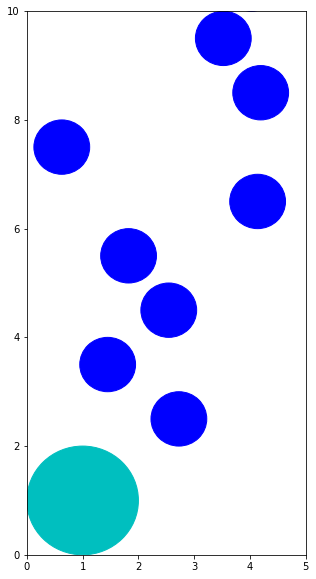

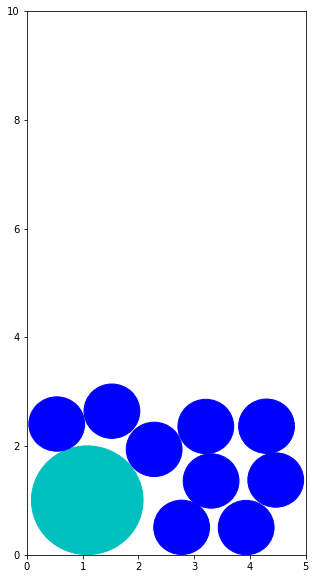

In [23]:
max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)
positions_after_shake = np.copy(positions)

shake_iters = 3
for i in range(shake_iters):
    next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, 10*16, -0.1)
    if i is not shake_iters-1:
        positions_after_shake = shake_box(positions_after_shake)

display_box(nuts, positions_after_shake ,0)

## 29/02/2020 Leap day brings leap in performance
A critical flaw was indentified in in the code, which forced the program to compute the largest nearest neighbour valye (an $n^2$ operation) for _every_ attempt made. As the system gets more and more settled it is obviously highly redundant to compute the largest nearest neighbour. A quick change in our code, only recomputing the value after a move is done, yields a huge speedup in the running time of our algorithm. 

Furthermore, we will only recompute the value in case it would be mathematically logical for it, otherwise we can simply check on the nearest neighbour for the two particles from which we took the old value and see if there's a larger value.

In [13]:
def nearest_neighbor(c_n, nuts, positions):
    """ 
    Returns the nearest neighbor between the current nut and the set of nuts. 

    Args:
        c_n: index of the nut to be evaluated
        nuts: array containing all the nut types
        positions: array containing the positions of all the nuts
    """

    nearest_neighbor = None
    nearest_neighbor_nut = None
    assert len(nuts) == len(positions), "Nut types and positions arrays should be the same length"
    for n in range(len(nuts)):
        d = np.sqrt((positions[n][0]-positions[c_n][0]-radii[int(nuts[n])]-radii[int(nuts[c_n])])**2 \
                  + (positions[n][1]-positions[c_n][1]-radii[int(nuts[n])]-radii[int(nuts[c_n])])**2)
        if (nearest_neighbor == None) or (d > 0.0 and d < nearest_neighbor) :
            nearest_neighbor = d
            nearest_neighbor_nut = n
    return nearest_neighbor, c_n, nearest_neighbor_nut

        


def largest_nearest_neighbor(nuts, positions):
    """
    Returns the largest possible shortest distance between the given array of particles.
    
    Args:
        nuts: array containing the types of nuts
        positions: array containing the x and y corrdinates of the positions of the nuts
    Returns:
        largest_distance: largest distance found
        a: index of the first nut
        b: index of the second nut
    """
    largest_distance = 0
    a = 0
    b = 0
    for i in range(len(nuts)):
        value, n1, n2 = nearest_neighbor(i, nuts, positions)
        if value > largest_distance:
            a = n1
            b = n2
            largest_distance = value

    return largest_distance, a, b


def energy(positions):
    """
    Calculates E/mg of the system given the positions of the nuts
    
    Args: 
        positions: x and y coordinates of the nuts
    Returns:
        Sum of E/mg for all the nuts in the system 
    """
    energy = 0
    for position in positions:
        energy += position[1]
    return energy

def shake_box(positions):
    """
    Shakes the box, multiplying all the vertical coordinates by 2

    Args: 
        positions: positions to be shook
    Returns:
        _Shaken_ positions
    """
    new_positions = np.zeros(positions.shape)
    for i in range(len(new_positions)):
        new_positions[i] = np.array([positions[i][0], 2*positions[i][1]])
    return new_positions


In [14]:
def mc_method(nuts, positions, beta_value, d_e_minimum):
    """
    Metropoli Monte Carlo method to _settle_ a set of nuts.
    
    Runs until after the difference in energy after a 1000 attempted moves is lower than the threshold. 
    **Note that we assume that all the nuts are the same weight.**
    
    Input: 
    
    Returns:
    
    """
    current_positions = np.copy(positions)
    max_n = len(nuts)
    # We will exit this loop once d_e > d_e_minimum
    while True:
        attempts = 0 
        d_e = 0
        max_step_length, nut1, nut2 = largest_nearest_neighbor(nuts,current_positions)
        success = 0 
        while attempts < 1000:
            current = rand.randrange(max_n)

            attempts += 1
            step = rand.uniform(0, max_step_length)
            angle = rand.uniform(0, 2*np.pi)
            x_step = step*np.cos(angle)
            y_step = step*np.sin(angle)

            
            # Check if the change in energy is positive (i.e. positive y_step)
            if y_step > 0:
                prob = np.exp(- beta_value*y_step*9.81)
                if rand.uniform(0,1) > prob: # Now we will make the attempt pass the probability test
                    continue
            
            new_positions = np.copy(current_positions)
            new_nuts = np.copy(nuts)
            
            new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
            nuts_to_check = np.delete(new_nuts, current)
            positions_to_check = np.delete(new_positions,current, axis=0)

            # Testing for overlap with walls
            if check_overlap_walls(nuts[current], new_positions[current]):
                continue

            # Testing for collisions
            passed_collisions = True
            for i in range(len(nuts_to_check)):
                if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                    passed_collisions = False
                    break
            if not passed_collisions:
                continue

            d_e += y_step*9.81
            
            current_positions = new_positions
            #max_step_length, nut1, nut2 = largest_nearest_neighbor(nuts, current_positions)
            
            # If we moved either of the nuts involved in the largest nearest neighbor value, recompute it
            if current == nut1 or current == nut2:
                max_step_length, nut1, nut2 = largest_nearest_neighbor(nuts, current_positions)
            else:
                val1, n11, n12 = nearest_neighbor(nut1, nuts, current_positions)
                val2, n21, n22 = nearest_neighbor(nut2, nuts, current_positions)
                if (val1 < max_step_length) and (val1 > val2):
                    max_step_length = val1
                    nut1 = n11
                    nut2 = n12
                elif (val2 < max_step_length) and (val2 > val1):
                    max_step_length = val2
                    nut1 = n21
                    nut2 = n22
            success+=1
            
        if d_e > d_e_minimum:
            break
                
    return nuts, current_positions

In [ ]:
start = time.time()

max_n = 10
nuts, positions = initial_preparation(max_n, 0)
positions_after_shake = np.copy(positions)

shake_iters = 15
for i in range(shake_iters):
    next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, 10**16, -1)
    if i is not shake_iters-1:
        positions_after_shake = shake_box(positions_after_shake)

    

end = time.time()
print(end - start, "s")


## 01/03/2020: Let the tests begin
With the algorithm to settle the nuts operating with reasonable performance we can now start investigating some of the physical properties of the nut mix. For example, we may try to see how the number of 'shakes' needed scales as the number of nuts increases. For this we will need to define a function that will check whether all the brazilian nuts are on top.

In [15]:
def check_settled(nuts, positions):
    """
    Checks if the nut configuration is settled. Currently assumes there's only one brazilian 
    nut in the configuration. Note that we will be taking into consideration the radii of the
    nuts.
    
    Args: 
        nuts: types of nuts
        positions: 2D array of the positions of the nuts
        
    Returns:
        True if the highest nut is a brazilian nut, false otherwise
    
    """
    highest_pos = 0.0
    highest_nut = 0
    for i in range(len(nuts)): 
        if (positions[i, 1]+radii[int(nuts[i])]) > (highest_pos+radii[int(nuts[highest_nut])]):
            highest_nut = i
            highest_pos = positions[i, 1]
    # Returns true if the highest nut is a brazilian nut, false otherwise
    return nuts[highest_nut] == 1

In [16]:
def until_brazilian_nut_top(n_nuts, beta, d_energy):
    """
    Settles and shakes the system until the brazilian nut is on top.
    
    Args:
        n_nuts: number of nuts
        beta: beta factor for the probability check for a positive energy increment
        d_energy: change in energy registered after a 1000 attempted moves needed for
        system not to be considered in a settled state.
    Returns:
        nuts: types of nuts 
        positions_after_shake: positions after brazilian nut is on top
        iters: number of shakes that were needed for system to be considered settled
    
    """
    nuts, positions = initial_preparation(n_nuts, 0)
    positions_after_shake = np.copy(positions)
    iters = 0 
    
    while not check_settled(nuts, positions_after_shake):
        if (iters !=0 ):
            positions_after_shake = shake_box(positions_after_shake)
        next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, beta, d_energy)
        iters +=1
    return nuts, positions_after_shake, iters

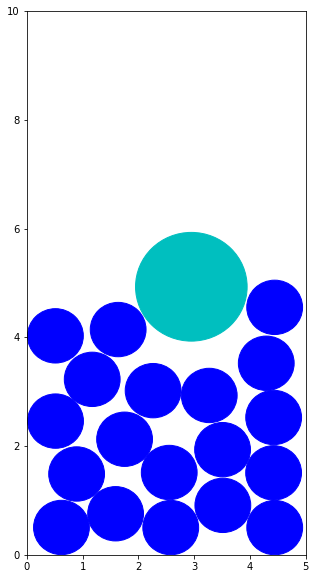

In [36]:
nuts, positions_after_shake, iters = until_brazilian_nut_top(20, 10**16, -1)
display_box(nuts, positions_after_shake,0)

## 05/03/2020: Testing the $N_{shakes}$  deviation for the same system 
Since we will be paying attention to the number of shakes, we will need to check whether for a fixed $N_{nuts}$,  $N_{shakes}$ until system is settled fluctuates drastically.

In [112]:
# Initial number of nuts, size of the increment is 5
max_n = 10
# Total number of increments that we will be attempting
increments = 15
tries = 5

shakes = np.zeros((increments, tries))
for n in range(increments):
    for i in range (tries):
        shakes[n,i] = until_brazilian_nut_top(max_n+n*5, 10**16, -1)[2]
print(shakes)

[[ 4.  4.  5.  7.  9.]
 [12.  9. 11.  6. 15.]
 [13. 15. 13. 16.  8.]
 [14.  8. 13. 33. 21.]
 [ 9. 20. 17. 14. 12.]
 [15. 16. 15. 15. 13.]
 [16. 16. 28. 15. 19.]
 [15. 14. 19. 18. 15.]
 [17. 22. 21. 20. 12.]
 [14. 16. 19. 22. 14.]
 [18. 17. 29. 22. 29.]
 [24. 18. 17. 18. 20.]
 [22. 21. 16. 19. 26.]
 [18. 22. 14. 18. 22.]
 [22. 32. 20. 30. 22.]]


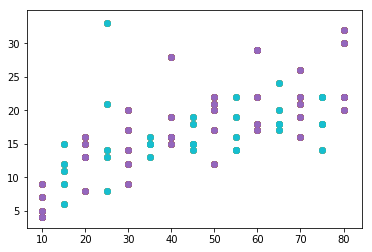

In [114]:
for n in range(increments):
    for i in range (tries):
        plt.scatter(max_n+n*5*np.ones(tries), shakes[n])

In [17]:
# Initial number of nuts, size of the increment is 5
max_n = 30
# Total number of increments that we will be attempting
increments = 10
tries = 5

shakes2 = np.zeros((increments, tries))
for n in range(increments):
    for i in range (tries):
        shakes2[n,i] = until_brazilian_nut_top(max_n+n*5, 10**16, -1)[2]


NameError: name 'shakes' is not defined

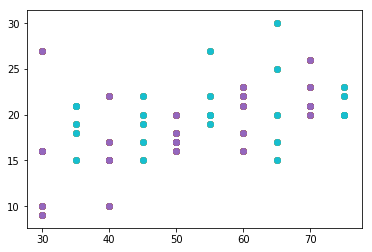

In [20]:
for n in range(increments):
    for i in range (tries):
        plt.scatter(max_n+n*5*np.ones(tries), shakes2[n])

In [21]:
# Initial number of nuts, size of the increment is 5
max_n = 30
# Total number of increments that we will be attempting
increments = 10
tries = 10

shakes3 = np.zeros((increments, tries))
for n in range(increments):
    for i in range (tries):
        shakes3[n,i] = until_brazilian_nut_top(max_n+n*5, 10**16, -1)[2]


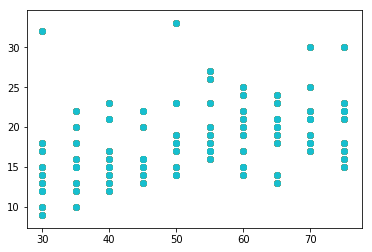

In [22]:
for n in range(increments):
    for i in range (tries):
        plt.scatter(max_n+n*5*np.ones(tries), shakes3[n])

In [23]:
# Initial number of nuts, size of the increment is 5
max_n = 70
# Total number of increments that we will be attempting
increments = 20
tries = 5

shakes4 = np.zeros((increments, tries))
for n in range(increments):
    for i in range (tries):
        shakes4[n,i] = until_brazilian_nut_top(max_n+n*5, 10**16, -1)[2]


KeyboardInterrupt: 

## 07/03/2020 - Variations of $r_{brazilian}/r_{regular}$

NameError: name 'shakes' is not defined

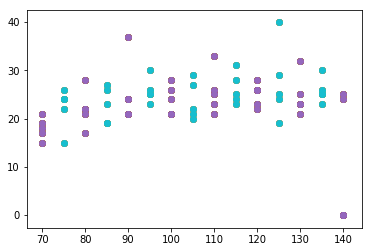

In [28]:
for n in range(increments-5):
    for i in range (tries):
        plt.scatter(max_n+n*5*np.ones(tries), shakes4[n])


In [30]:
print(shakes3)

[[12. 32. 14. 17. 18. 15. 13.  9. 10. 12.]
 [10. 15. 15. 22. 12. 15. 16. 13. 18. 20.]
 [12. 16. 15. 15. 21. 14. 21. 23. 17. 13.]
 [15. 16. 16. 16. 14. 13. 20. 22. 15. 22.]
 [18. 15. 23. 33. 14. 18. 14. 19. 23. 17.]
 [17. 19. 17. 27. 17. 16. 18. 26. 23. 20.]
 [14. 25. 19. 17. 15. 22. 15. 21. 20. 24.]
 [20. 23. 14. 24. 21. 20. 18. 21. 13. 19.]
 [19. 25. 30. 17. 18. 21. 21. 21. 22. 18.]
 [21. 22. 30. 22. 22. 23. 15. 18. 17. 16.]]
